In [116]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
raw_business_data = pd.read_csv('Legally_Operating_Businesses.csv',index_col = 'DCA License Number',low_memory=False)
raw_nyc_data = pd.read_csv('new_york.csv')

print(raw_nyc_data.columns)

print(raw_business_data.columns)


Index(['Zip Code', 'City', 'State', 'Population', 'Population Estimate',
       'Business Annual Payroll', 'Business First Quarter Payroll',
       'Median Age', 'Male Population', 'Female Population',
       'Median Age Female', 'Median Age Male', 'Households',
       'Persons Per Household', 'Income Per Household', 'Number of Businesses',
       'Number of Employees', 'Delivery Business', 'Delivery Residential',
       'Delivery Total', 'Average House Value', 'CBSA Population',
       'CBSA Division Population', 'CBSA Name', 'CBSA Number', 'CBSA Type',
       'City Alias Name', 'State Full Name', 'State FIPS', 'County Name',
       'County FIPS', 'Latitude', 'Longitude', 'Region', 'Division',
       'Area Code', 'DayLight Savings', 'Land Area', 'Water Area',
       'Congressional District', 'Congressional Land Area', 'Asian Population',
       'Black or African American Population',
       'American Indian or Alaskan Native Population',
       'Native Hawaiian or other Pacific Island

In [118]:
len(raw_nyc_data['Congressional District'].unique())


102

In [206]:
df_business = raw_business_data[raw_business_data['Address State'] == 'NY']
df_business = df_business[['License Expiration Date','License Status', 'License Creation Date','Industry','Address ZIP','Longitude', 'Latitude','Borough Code']]
df_business = df_business.dropna()


In [207]:
print(raw_nyc_data.columns)
df_nyc = raw_nyc_data[['Zip Code','Congressional District','Population','Business Annual Payroll','Female Population','Median Age','Households',\
                 'Income Per Household', 'Number of Businesses','White Population']]

df_nyc.loc[:,'female_percentage'] = df_nyc['Female Population']/df_nyc['Population']
df_nyc.loc[:,'colored_percentage'] = 1-df_nyc['White Population']/df_nyc['Population']
df_nyc = df_nyc.drop(['Female Population','White Population'],axis=1)

# merge two dataframes by the intersection of column ZIP
df_nyc.rename(columns = {'Zip Code':'Address ZIP'}, inplace = True) 
df_business.loc[:,'Address ZIP'] = df_business['Address ZIP'].astype(int)
df_com = pd.merge(df_business, df_nyc, how='inner',on='Address ZIP')

df_com=df_com.dropna()

Index(['Zip Code', 'City', 'State', 'Population', 'Population Estimate',
       'Business Annual Payroll', 'Business First Quarter Payroll',
       'Median Age', 'Male Population', 'Female Population',
       'Median Age Female', 'Median Age Male', 'Households',
       'Persons Per Household', 'Income Per Household', 'Number of Businesses',
       'Number of Employees', 'Delivery Business', 'Delivery Residential',
       'Delivery Total', 'Average House Value', 'CBSA Population',
       'CBSA Division Population', 'CBSA Name', 'CBSA Number', 'CBSA Type',
       'City Alias Name', 'State Full Name', 'State FIPS', 'County Name',
       'County FIPS', 'Latitude', 'Longitude', 'Region', 'Division',
       'Area Code', 'DayLight Savings', 'Land Area', 'Water Area',
       'Congressional District', 'Congressional Land Area', 'Asian Population',
       'Black or African American Population',
       'American Indian or Alaskan Native Population',
       'Native Hawaiian or other Pacific Island

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [208]:
df_com['Congressional District'].unique()



array(['07|10', '06|07', '07|08', '12', '09', '10|12', '13', '12|13',
       '08', '10|13', '05', '05|06|16', '08|10|11', '14', '07', '06',
       '16', '07|12', '10', '11', '13|15', '09|10', '08|09', '12|14',
       '05|06', '15', '07|10|11', '06|07|12', '05|06|07', '07|09|10',
       '14|15', '10|12|14', '03', '05|07|08', '08|09|11', '07|09',
       '10|11', '13|14|15', '07|10|12', '06|14', '03|05', '13|16',
       '14|16', '13|14|16', '03|06', '08|09|10|11', '05|07', '06|12|14',
       '07|08|09', '03|06|14', '03|05|06', '03|04|05', '04|05', '17',
       '03|04', '19', '20', '02|03', '26'], dtype=object)

In [209]:
# Transform industry using one-hot encoding

industry_dums = pd.get_dummies(df_com['Industry'])
df_com = pd.concat([df_com,industry_dums],axis=1)


df_com

,License Expiration Date,License Status,License Creation Date,Industry,Address ZIP,Longitude,Latitude,Borough Code,Congressional District,Population,...,Secondhand Dealer - General,Sidewalk Cafe,Sightseeing Bus,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption
0,03/31/2020,Active,03/25/2016,Stoop Line Stand,10013,-73.997619,40.718663,1.0,07|10,27700,...,0,0,0,0,1,0,0,0,0,0
1,03/31/2020,Active,05/27/2009,Stoop Line Stand,10013,-73.996970,40.718101,1.0,07|10,27700,...,0,0,0,0,1,0,0,0,0,0
2,12/31/2020,Active,08/19/2003,Tobacco Retail Dealer,10013,-73.997634,40.718636,1.0,07|10,27700,...,0,0,0,0,0,0,0,1,0,0
3,12/31/2021,Active,10/17/2002,Tobacco Retail Dealer,10013,-73.999311,40.717549,1.0,07|10,27700,...,0,0,0,0,0,0,0,1,0,0
4,12/31/2021,Active,02/14/2018,Tobacco Retail Dealer,10013,-74.007053,40.718268,1.0,07|10,27700,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115249,02/28/2021,Active,02/21/2007,Home Improvement Contractor,11021,-77.519584,40.112385,4.0,03,17729,...,0,0,0,0,0,0,0,0,0,0
115255,12/31/2018,Inactive,08/03/2012,Electronics Store,12172,-73.976077,40.683501,3.0,19,405,...,0,0,0,0,0,0,0,0,0,0
115257,02/28/2015,Inactive,01/08/2014,Home Improvement Contractor,10704,-73.786260,40.848516,2.0,16,30165,...,0,0,0,0,0,0,0,0,0,0
115259,02/28/2021,Active,07/10/2018,Home Improvement Contractor,11096,-74.013215,40.703116,1.0,05,8344,...,0,0,0,0,0,0,0,0,0,0


In [210]:
# calculate life_span and right_censor
df_com.loc[:,'License Expiration Date'] = pd.to_datetime(df_com['License Expiration Date'])
df_com.loc[:,'License Creation Date'] = pd.to_datetime(df_com['License Creation Date'])
df_com['Y'] = (df_com['License Expiration Date']-df_com['License Creation Date']).dt.days
today = pd.to_datetime(pd.DataFrame({'year': [2019],'month': [11],'day': [22]}))

df_com['right_censor'] = np.where(df_com['License Expiration Date'].values > today.values,0,1)

df_com['Creation Year'] = (df_com['License Creation Date'].apply(lambda x: x.strftime('%Y'))).astype(int)



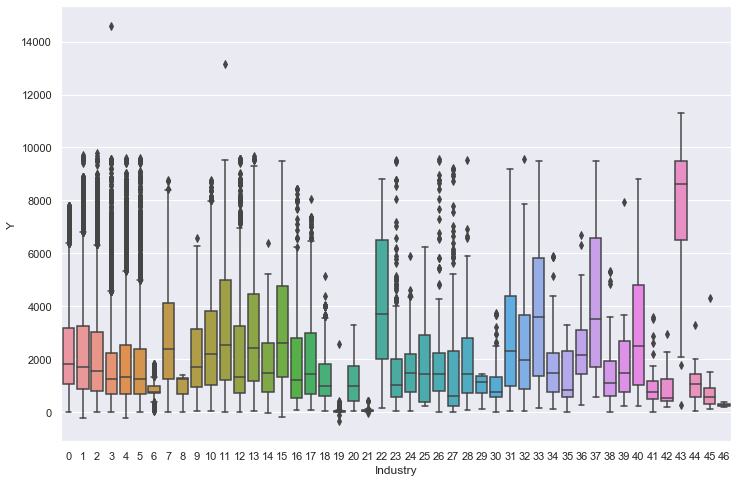

In [103]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Industry', y='Y',data=df_com)
plt.show()

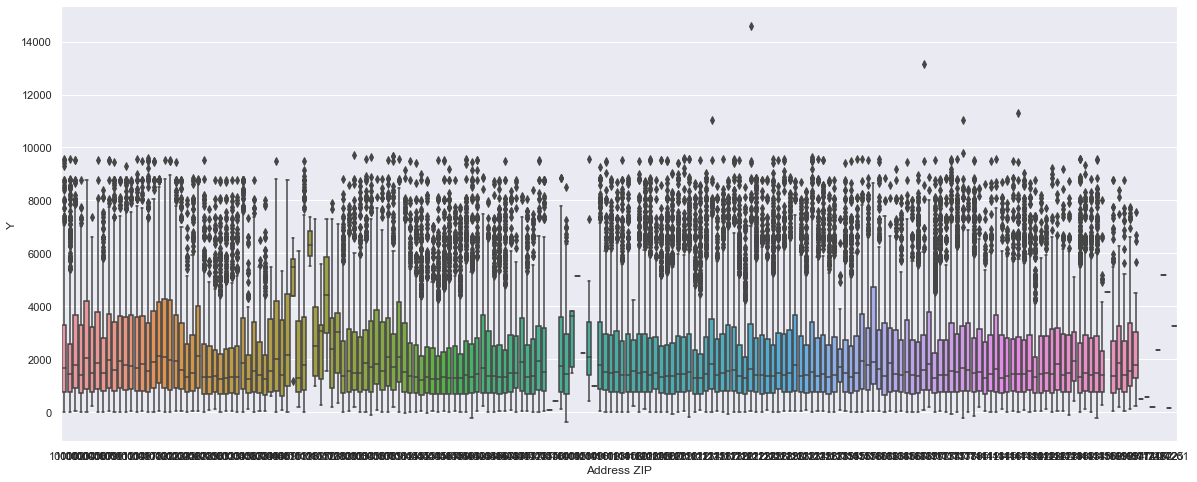

In [86]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Address ZIP', y='Y',data=df_com)
plt.show()

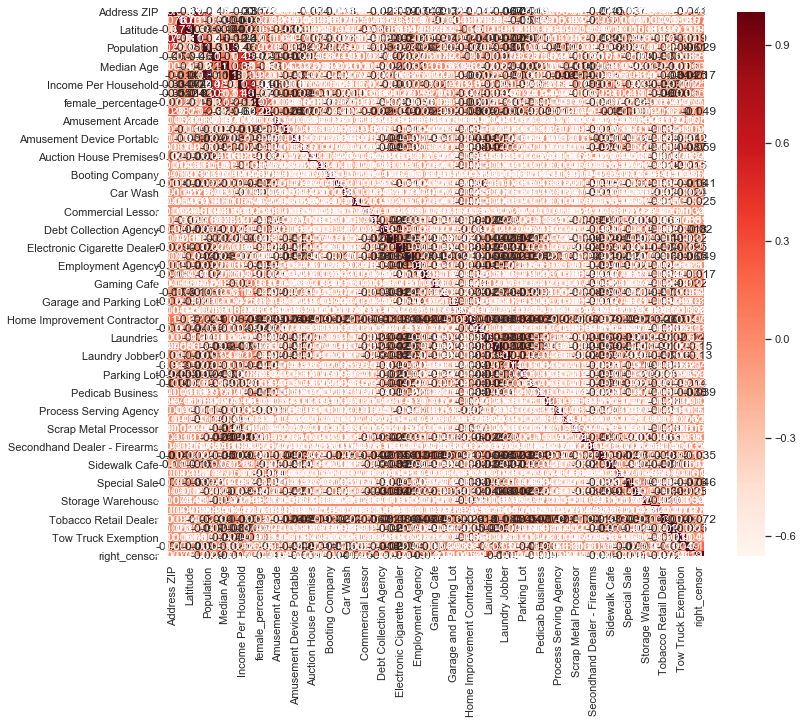

In [123]:
plt.figure(figsize=(12,10))
cor = df_com.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

* Choice of baseline model: 
    * Regression problem:
        * linear regression
        * regression tree
    * Classification problem:
        * SVM 
        * Logistic Regression
* Evaluation metrics for linear regression: 
    * RSE - mean squared error
    * R2-score
    * P-values
    
* Data exploration:
    * observe lifespan distribution (XYQ)
* Feature Selection: Why does our baseline perform so badly?
    * Finding feature correlations with Y
        * Correlation (ZYH)
        * Stepwise Selection (ZYH)
        * Mutual Information (DYD)
        * Lift/leverage (XYQ)
* Model Selection:
    * Cox proportional regression (ZYH)
    * As a classification problem: https://arxiv.org/abs/1909.11171 (DYD, XYQ)

In [211]:
df_baseline = df_com.iloc[:,9:]
df_baseline
#drop(['License Expiration Date','License Status','License Creation Date','Longitude','Latitude'],axis=1)

,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,Amusement Device Permanent,...,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,Y,right_censor,Creation Year
0,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,0,0,...,0,1,0,0,0,0,0,1467,0,2016
1,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,0,0,...,0,1,0,0,0,0,0,3961,0,2009
2,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,0,0,...,0,0,0,0,1,0,0,6344,0,2003
3,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,0,0,...,0,0,0,0,1,0,0,7015,0,2002
4,27700,8251251,37.6,12096,106056,5229,0.496354,0.421552,0,0,...,0,0,0,0,1,0,0,1416,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115249,17729,951508,46.1,7846,93598,2005,0.543065,0.195273,0,0,...,0,0,0,0,0,0,0,5121,0,2007
115255,405,1085,33.3,137,46176,5,0.474074,0.064198,0,0,...,0,0,0,0,0,0,0,2341,1,2012
115257,30165,506993,40.7,12465,74908,1075,0.521366,0.227814,0,0,...,0,0,0,0,0,0,0,416,1,2014
115259,8344,264404,34.4,2536,53875,345,0.514262,0.511385,0,0,...,0,0,0,0,0,0,0,964,0,2018


In [212]:
names = df_com['Industry'].unique()

df_baseline = df_baseline.apply(lambda x: x if x.name in names else preprocessing.scale(x))
df_baseline

,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,Amusement Device Permanent,...,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,Y,right_censor,Creation Year
0,-1.178974,1.429970,0.480199,-1.105675,1.405426,2.337388,-0.945276,-0.340207,0,0,...,0,1,0,0,0,0,0,-0.360549,-1.285601,0.906940
1,-1.178974,1.429970,0.480199,-1.105675,1.405426,2.337388,-0.945276,-0.340207,0,0,...,0,1,0,0,0,0,0,1.011605,-1.285601,-0.381492
2,-1.178974,1.429970,0.480199,-1.105675,1.405426,2.337388,-0.945276,-0.340207,0,0,...,0,0,0,0,1,0,0,2.322689,-1.285601,-1.485862
3,-1.178974,1.429970,0.480199,-1.105675,1.405426,2.337388,-0.945276,-0.340207,0,0,...,0,0,0,0,1,0,0,2.691861,-1.285601,-1.669923
4,-1.178974,1.429970,0.480199,-1.105675,1.405426,2.337388,-0.945276,-0.340207,0,0,...,0,0,0,0,1,0,0,-0.388608,-1.285601,1.275063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115249,-1.566119,-0.243126,2.518611,-1.588762,0.982111,0.163103,0.871046,-1.249930,0,0,...,0,0,0,0,0,0,0,1.649816,-1.285601,-0.749615
115255,-2.238759,-0.460963,-0.550997,-2.465025,-0.629259,-1.185708,-1.811601,-1.776901,0,0,...,0,0,0,0,0,0,0,0.120310,0.777847,0.170693
115257,-1.083265,-0.345009,1.223620,-1.063731,0.347037,-0.464094,0.027293,-1.119106,0,0,...,0,0,0,0,0,0,0,-0.938791,0.777847,0.538817
115259,-1.930511,-0.400610,-0.287203,-2.192336,-0.367651,-0.956410,-0.248942,0.020955,0,0,...,0,0,0,0,0,0,0,-0.637291,-1.285601,1.275063


In [213]:
from sklearn.model_selection import *
from sklearn import metrics 
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#df_baseline = df_com[['Income Per Household','Y']]

#fit a baseline model
X = df_baseline.drop(['Y'],axis=1)
Y = df_baseline['Y']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75,test_size=0.25)


In [228]:
df_com['Industry'].unique()

array(['Stoop Line Stand', 'Tobacco Retail Dealer', 'Laundries',
       'Sidewalk Cafe', 'Pool or Billiard Room',
       'Secondhand Dealer - General', 'Garage', 'Special Sale',
       'Pawnbroker', 'Games of Chance', 'Electronic Cigarette Dealer',
       'Parking Lot', 'Home Improvement Contractor',
       'Amusement Device Temporary', 'Gaming Cafe', 'Employment Agency',
       'Electronic & Appliance Service', 'Electronics Store', 'Cabaret',
       'Dealer In Products', 'Laundry Jobber', 'Process Serving Agency',
       'Newsstand', 'Debt Collection Agency', 'Amusement Arcade',
       'Pedicab Business', 'Bingo Game Operator', 'Laundry',
       'Secondhand Dealer - Auto', 'Catering Establishment',
       'Garage and Parking Lot', 'Amusement Device Permanent', 'Car Wash',
       'Tow Truck Company', 'Scrap Metal Processor',
       'Amusement Device Portable', 'Tow Truck Exemption',
       'Scale Dealer Repairer', 'Storage Warehouse',
       'Auction House Premises', 'General Vendor Di

In [215]:
X_train = sm.add_constant(X_train)
lr = sm.OLS(Y_train,X_train).fit()

X_test = sm.add_constant(X_test)
Y_pred = lr.predict(X_test) 

display(lr.summary())


# calculate MAE, MSE, RMSE
print('MAE: ',metrics.mean_absolute_error(Y_test, Y_pred))
print('MSE: ',metrics.mean_squared_error(Y_test, Y_pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))



#display(Y_test)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     7986.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:30:59   Log-Likelihood:                -43680.
No. Observations:               86039   AIC:                         8.747e+04
Df Residuals:                   85982   BIC:                         8.801e+04
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.0205      0.008     -2.554      0.011      -0.036      -0.005
Population                         0.0191      0.005      3.752      0.000       0.009       0.029
Business Annual Payroll            0.0042      0.003      1.645      0.100      -0.001       0.009
Median Age                         0.0055      0.002      3.371      0.001       0.002       0.009
Households                        -0.0158      0.005     -3.281      0.001      -0.025      -0.006
Income Per Household               0.0127      0.002      5.769      0.000       0.008       0.017
Number of Businesses              -0.0026      0.003     -0.994      0.320      -0.008       0.003
female_percentage                  0.0016      0.002      0.913      0.361      -0.002       0.005
colored_percentage                -0.0128      0.002     -5.843      0.000      -0.017      -0.008
Amusement Arcade                  -0.3130      0.064     -4.924      0.000      -0.438      -0.188
Amusement Device Permanent         0.0395      0.028      1.407      0.159      -0.016       0.095
Amusement Device Portable          0.0225      0.017      1.303      0.192      -0.011       0.056
Amusement Device Temporary        -0.1234      0.020     -6.213      0.000      -0.162      -0.085
Auction House Premises            -0.0925      0.052     -1.795      0.073      -0.193       0.009
Bingo Game Operator               -0.1410      0.042     -3.334      0.001      -0.224      -0.058
Booting Company                    0.1182      0.161      0.735      0.463      -0.197       0.434
Cabaret                            0.0118      0.027      0.439      0.661      -0.041       0.065
Car Wash                           0.2297      0.037      6.176      0.000       0.157       0.303
Catering Establishment             0.1462      0.043      3.383      0.001       0.062       0.231
Commercial Lessor                  0.1745      0.110      1.592      0.111      -0.040       0.389
Dealer In Products                -0.0744      0.014     -5.423      0.000      -0.101      -0.047
Debt Collection Agency            -0.1587      0.023     -6.803      0.000      -0.204      -0.113
Electronic & Appliance Service    -0.0221      0.010     -2.144      0.032      -0.042      -0.002
Electronic Cigarette Dealer       -0.0450      0.012     -3.842      0.000      -0.068      -0.022
Electronics Store                  0.0100      0.009      1.081      0.280      -0.008       0.028
Employment Agency                 -0.1452      0.017     -8.399      0.000      -0.179      -0.111
Games of Chance                   -0.0532      0.031     -1.705      0.088      -0.114       0.008
Gaming Cafe                       -0.2216      0.039     -5.635      0.000      -0.299      -0.145
Garage        

MAE:  0.3178277812026252
MSE:  0.16247449232716915
RMSE:  0.40308124779896315


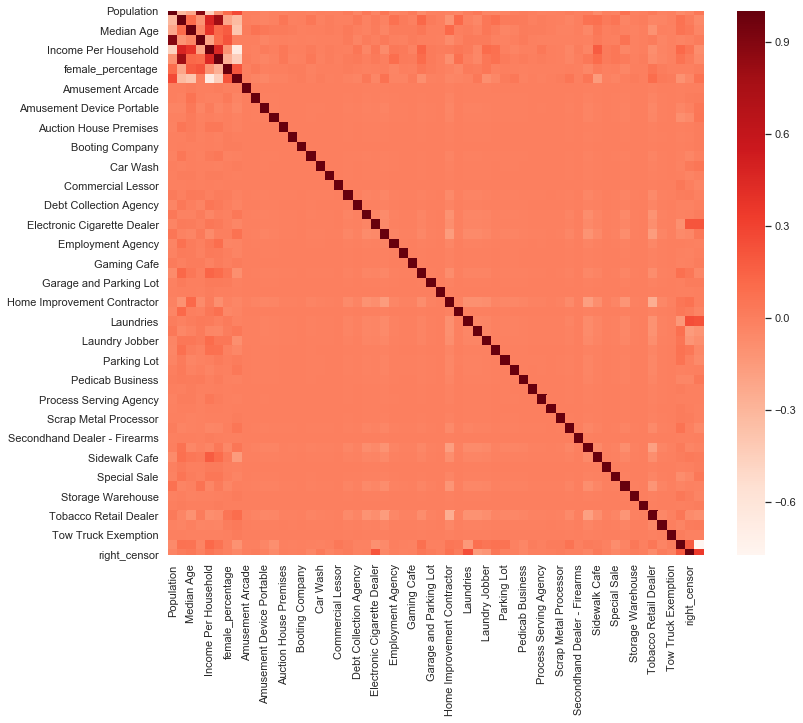

In [143]:
plt.figure(figsize=(12,10))
cor = df_baseline.corr()
sns.heatmap(cor,cmap=plt.cm.Reds)
plt.show()

In [216]:
from lifelines import CoxPHFitter

In [229]:
from lifelines.datasets import load_rossi

df_train = pd.concat([X_train.drop(['const','Laundry Jobber'],axis=1),Y_train],axis=1)

df_train

,Population,Business Annual Payroll,Median Age,Households,Income Per Household,Number of Businesses,female_percentage,colored_percentage,Amusement Arcade,Amusement Device Permanent,...,Special Sale,Stoop Line Stand,Storage Warehouse,Ticket Seller Business,Tobacco Retail Dealer,Tow Truck Company,Tow Truck Exemption,right_censor,Creation Year,Y
19112,0.906430,-0.295445,0.983807,1.261906,-0.993755,0.832788,0.216248,0.629619,0,0,...,0,0,0,0,0,0,0,0.777847,-2.406170,2.826656
86017,-0.560419,0.869765,1.247601,0.330855,2.009783,0.761301,1.800150,-1.614635,0,0,...,0,0,0,0,0,0,0,-1.285601,1.091002,-0.753379
15949,-0.317167,-0.323257,-1.462287,-0.717386,-0.456202,-0.433746,-1.583578,0.362665,0,0,...,0,0,0,0,0,0,0,0.777847,1.091002,-0.799044
24077,1.413474,-0.384373,-1.174511,0.839745,-0.853115,-0.588185,0.372257,1.257501,0,0,...,0,0,0,0,0,0,0,0.777847,-1.117738,0.133514
93844,-0.633491,-0.273083,0.815938,-0.759102,0.385637,-0.555813,-0.260970,-1.158491,0,0,...,0,0,0,0,0,0,0,-1.285601,-2.406170,3.325121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60511,-0.123730,-0.196860,1.895097,-0.193607,-0.685800,1.229339,0.460564,0.771370,0,0,...,0,0,0,0,0,0,0,0.777847,1.275063,-0.966300
33957,1.612618,-0.198774,-0.766829,0.817807,-0.752162,0.625071,-1.002215,0.647233,0,0,...,0,0,0,0,0,0,0,0.777847,-2.038047,1.098534
32866,0.482671,-0.305729,-1.510250,0.119320,-1.279624,-0.619207,0.526358,1.048079,0,0,...,0,0,0,0,0,0,0,0.777847,-1.117738,0.219343
63315,0.687989,-0.325283,-0.167296,0.912947,-0.500613,-0.445211,0.436643,0.559158,0,0,...,0,0,0,0,0,0,0,0.777847,1.275063,-1.048277


In [241]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter(penalizer=0.1)   ## Instantiate the class to create a cph object
cph.fit(df_train, 'Y', event_col='right_censor',step_size=0.01)   ## Fit the data to train the model
#cph.print_summary()    ## HAve a look at the significance of the features 

<lifelines.CoxPHFitter:"None", fitted with 86039 total observations, 0 right-censored observations>

In [242]:
cph.print_summary()  

model,lifelines.CoxPHFitter
duration col,'Y'
event col,'right_censor'
penalizer,0.1
number of observations,86039
number of events observed,86039
partial log-likelihood,-865619.40
time fit was run,2019-11-28 00:49:58 UTC


,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,z,p,-log2(p)
Population,-0.02,0.98,0.01,-0.04,0.01,0.96,1.01,-1.44,0.15,2.73
Business Annual Payroll,-0.00,1.00,0.01,-0.01,0.01,0.99,1.01,-0.49,0.63,0.67
Median Age,-0.01,0.99,0.00,-0.01,0.00,0.99,1.00,-1.57,0.12,3.11
Households,0.02,1.02,0.01,-0.00,0.04,1.00,1.04,1.64,0.10,3.30
Income Per Household,-0.01,0.99,0.01,-0.02,-0.00,0.98,1.00,-2.53,0.01,6.46
Number of Businesses,0.00,1.00,0.01,-0.01,0.01,0.99,1.01,0.03,0.97,0.04
female_percentage,-0.00,1.00,0.00,-0.01,0.01,0.99,1.01,-0.15,0.88,0.18
colored_percentage,0.01,1.01,0.01,0.00,0.02,1.00,1.02,2.33,0.02,5.67
Amusement Arcade,-0.07,0.94,0.17,-0.40,0.27,0.67,1.30,-0.39,0.70,0.52
Amusement Device Permanent,-0.06,0.94,0.08,-0.21,0.09,0.81,1.09,-0.78,0.43,1.21
